In [174]:
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
import pandas as pd

# Task 1,2,3,4

# Load Data from CSV file

In [175]:
target=pd.read_csv('ROI_data.csv')
target

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


# Get all of the medium names

In [176]:
target_index=pd.DataFrame(target.columns).iloc[1:,:]
target_index.columns=['medium']
target_index.T

,1,2,3,4,5,6,7,8,9,10
medium,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email


# Define 2 ROI scenarios as objectives to maximize

In [177]:
obj1 = np.array(target.iloc[0,1:].values.astype('float')) # objective vector for allocation 1
obj2 = np.array(target.iloc[1,1:].values.astype('float')) # objective vector for allocation 2

In [178]:
obj2

array([0.049, 0.023, 0.024, 0.039, 0.044, 0.046, 0.026, 0.019, 0.037,
       0.026])

In [179]:
#Reference here
target_index.T

,1,2,3,4,5,6,7,8,9,10
medium,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email


In [180]:
# Constrains: 
    
A = np.zeros((13,10)) # initialize constraint matrix

A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]  # print and TV no more than Facebook and Email
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]  # Facebook, LinkedIn, Instagram, Snapchat, and Twitter > 2X (SEO+AdWords)
A[2:12,:] = np.identity(10)  # each platform <3
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # total <10
b = np.array([0.,0.,3.,3.,3.,3.,3.,3.,3.,3.,3.,3.,10.]) # constrains
sense = np.array(['<']*13) # all constraints are less than or equal constraints

In [181]:
A

array([[ 1.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  2.,  2., -1., -1., -1., -1., -1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [182]:
b

array([ 0.,  0.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3., 10.])

# Run model for ROI case #1 as Base Case

In [183]:

ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.optimize() # solve the LP
x1=ojModX.x
y1=ojModel.objVal # optimal ROI

# Run model for ROI case #2 for Second Firms ROI Estimate

In [184]:

ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.optimize() # solve the LP
x2=ojModX.x
y2=ojModel.objVal # optimal ROI

# Generate summary table to compare funds allocations for the 2 ROI cases

In [185]:
allo=target_index
allo['amount_allo_1']=np.round(x1,2)
allo['amount_allo_2']=np.round(x2,2)
allo.columns=['platform','amount_allo_1','amount_allo_2']
allo

,platform,amount_allo_1,amount_allo_2
1,Print,0.0,3.0
2,TV,3.0,0.0
3,SEO,0.0,0.0
4,AdWords,1.0,1.0
5,Facebook,0.0,3.0
6,LinkedIn,0.0,3.0
7,Instagram,3.0,0.0
8,Snapchat,0.0,0.0
9,Twitter,0.0,0.0
10,Email,3.0,0.0


# 5

**Are the allocations the same?**

# As we can see from the table below, the allocation is very difference for Print, TV, Facebook, LinkedIn, Instagram, and Email between the 2 cases. However, SEO, AdWords, SnapChat and Twitter, the allocations are the same.

In [186]:
allo

,platform,amount_allo_1,amount_allo_2
1,Print,0.0,3.0
2,TV,3.0,0.0
3,SEO,0.0,0.0
4,AdWords,1.0,1.0
5,Facebook,0.0,3.0
6,LinkedIn,0.0,3.0
7,Instagram,3.0,0.0
8,Snapchat,0.0,0.0
9,Twitter,0.0,0.0
10,Email,3.0,0.0


**Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)?  Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective?  Do you think the third constraint above, based on your boss’ experience, is useful?**

In [187]:
print('Assume ROI 1 is correct:')
print('Allocation 1 would have a return of {}.'.format(round(y1,3)))
print('while allocationi 2 would have a return of {}.'.format(x2@obj1.T))
print('So we would have ${}million lower ROI by mistakenly use allocation 2.'.format(round((y1-x2@obj1.T),3)))

Assume ROI 1 is correct:
Allocation 1 would have a return of 0.456.
while allocationi 2 would have a return of 0.252.
So we would have $0.204million lower ROI by mistakenly use allocation 2.


In [188]:
print('Assume ROI 2 is correct:')
print('Allocation 2 would have a return of {}'.format(round(y2,3)))
print('while allocation 1 would have a return of {}'.format(round(x1@obj2.T,3)))
print('So we would have ${}million lower ROI by mistakenly use allocation 1'.format(round((y2-x1@obj2.T),3)))

Assume ROI 2 is correct:
Allocation 2 would have a return of 0.456
while allocation 1 would have a return of 0.264
So we would have $0.192million lower ROI by mistakenly use allocation 1


**Do you think the third constraint above, based on your boss’ experience, is useful?**

# Yes it's useful constrains (bounding constrains). Without the constrain on cap of funds for each medium, all funds go to TV and Email.

In [189]:
# This is to lift the constrain for fund cap

A = np.zeros((3,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]  # print and TV no more than Facebook and Email
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]  # Facebook, LinkedIn, Instagram, Snapchat, and Twitter > 2X (SEO+AdWords) # each platform <3
A[2,:] = [1,1,1,1,1,1,1,1,1,1] # total <10
b = np.array([0.,0.,10.]) # constrains

sense = np.array(['<']*3) # all constraints are less than or equal constraints
ojModel = gp.Model() # initialize an empty model
ojModX = ojModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.optimize() # solve the LP

print('Without cap for each medium, we got funds allocation as follows')
temp_allo=pd.DataFrame({'allocation':ojModX.x})
temp_allo.index=allo['platform']
temp_allo.T

Without cap for each medium, we got funds allocation as follows


platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
allocation,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


# Let's try to change the cap funds for each funds. We tried to increase the allocation cap from 1 to 10 Million dollars.

In [190]:
# Test how allocation's sensitivity to funds cap for each medium (platform)   
A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]  # print and TV no more than Facebook and Email
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]  # Facebook, LinkedIn, Instagram, Snapchat, and Twitter > 2X (SEO+AdWords)
A[2:12,:] = np.identity(10)  # each platform <3
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # total <10
b = np.array([0.,0.,3.,3.,3.,3.,3.,3.,3.,3.,3.,3.,10.]) # constrains
allo_change=[]
target_change=[]
counter=[]
for i in range(1,11,1):  # try to increase fund cap from $1 to 10 Million
    for j in range(2,12,1):  # make sure caps for all funds are set to change 
        b[j]=i
    sense = np.array(['<']*13) # all constraints are less than or equal constraints
    ojModel = gp.Model() # initialize an empty model
    ojModX = ojModel.addMVar(10) # tell the model how many variables there are
    # must define the variables before adding constraints because variables go into the constraints
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
    ojModel.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
    ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
    ojModel.optimize() # solve the LP
    counter.append(i)
    allo_change.append(ojModX.x)
    target_change.append(ojModel.objVal) # optimal ROI

# As we can see fro the table below, as we increase the cap for each medium, the funds allocation would change. As the cap for each medium increases to 5 and up, all funds for ads goes to TV and Email to generate max return.

In [191]:
allo_change=pd.DataFrame(allo_change)
allo_change.index=counter
allo_change.columns=target_index['platform']
allo_change.index.names=['max for each medium in $M']
allo_change

platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
max for each medium in $M,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0
3,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0
4,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
6,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


# 6

**6)	To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data.  Use the first ROI data as your starting point.  By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?**

# Let's start from the first objective

In [192]:
obj1 = np.array(target.iloc[0,1:].values.astype('float')) # objective vector for allocation 1

In [193]:
obj1

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044])

# Here is the fund allocation

In [194]:
obj1 = np.array(target.iloc[0,1:].values.astype('float')) # objective vector for allocation 1
print(obj1)
print(x1)

[0.031 0.049 0.024 0.039 0.016 0.024 0.046 0.026 0.033 0.044]
[0. 3. 0. 1. 0. 0. 3. 0. 0. 3.]


In [195]:
#To show the starting allocation
senstivity_test=allo.copy()
senstivity_test['ROI']=obj1
senstivity_test.drop(['amount_allo_2'],axis=1,inplace=True)
#rearrange
cols=senstivity_test.columns.tolist()
cols=['platform','ROI','amount_allo_1']
senstivity_test=senstivity_test[cols]
senstivity_test

,platform,ROI,amount_allo_1
1,Print,0.031,0.0
2,TV,0.049,3.0
3,SEO,0.024,0.0
4,AdWords,0.039,1.0
5,Facebook,0.016,0.0
6,LinkedIn,0.024,0.0
7,Instagram,0.046,3.0
8,Snapchat,0.026,0.0
9,Twitter,0.033,0.0
10,Email,0.044,3.0


# This is to find out the sensitivity of optimization combination on ROI variation

In [196]:
# Constrains: 
    
A = np.zeros((13,10)) # initialize constraint matrix

A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]  # print and TV no more than Facebook and Email
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]  # Facebook, LinkedIn, Instagram, Snapchat, and Twitter > 2X (SEO+AdWords)
A[2:12,:] = np.identity(10)  # each platform <3
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # total <10
b = np.array([0.,0.,3.,3.,3.,3.,3.,3.,3.,3.,3.,3.,10.]) # constrains
sense = np.array(['<']*13) # all constraints are less than or equal constraints

ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(10) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
ojModel.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.optimize() # solve the LP
x1=ojModX.x
y1=ojModel.objVal # optimal ROI

# This table summarizes the upper and lower limit of each ROI before it would affect the optimization outcome of the basecase scenario where inf means it would affect the outcome in that direction

In [197]:
sensitivity = pd.DataFrame(
    {'lowerlimit': ojModX.SAObjLow,
     'basecase': obj1,
     'upperlimit': ojModX.SAObjUp
    })

sensitivity.index=senstivity_test['platform']
sensitivity

,lowerlimit,basecase,upperlimit
platform,,,
Print,-inf,0.031,0.049
TV,0.039,0.049,0.062
SEO,-inf,0.024,0.039
AdWords,0.033,0.039,0.046
Facebook,-inf,0.016,0.029
LinkedIn,-inf,0.024,0.039
Instagram,0.039,0.046,inf
Snapchat,-inf,0.026,0.039
Twitter,-inf,0.033,0.039


<ipython-input-198-65e2b7d3d73a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sensitivity.index)


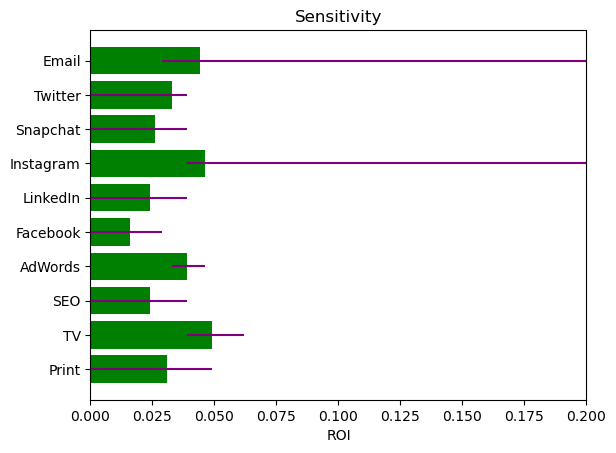

In [198]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()

x = sensitivity.index
y = sensitivity['basecase']

fig, ax = plt.subplots()

lower_err=sensitivity['basecase']-sensitivity['lowerlimit'].replace(-np.inf,-2)
upper_err=sensitivity['upperlimit'].replace(np.inf,2)-sensitivity['basecase']               
asymmetric_err = [lower_err, upper_err]

ax.barh(x, y, color='green',xerr=asymmetric_err, ecolor='purple',align='center')
ax.set_yticklabels(sensitivity.index)
ax.set_title('Sensitivity')
ax.set_xlabel('ROI')
ax.set_ylabel=('medium type')
ax.set_xlim(0,0.2)

plt.show()

# When purple line touchs the edge of the plot it indicate infinity (no upper of lower limit)

# 7

**Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M.  The monthly ROI for next year is given in ROI.csv. The three constraints given by your boss are still in place for each month.  What is the optimal allocation for each month?**

# 8

**A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model.  Describe how my might model this?**

# Use the original ROI as constant ROI, as we can see, the allocation is stable

In [199]:
# Using the original ROI
obj1 = np.array(target.iloc[0,1:].values.astype('float')) # objective vector for allocation 1
obj1

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044])

In [200]:
# Initiate the constrains       
A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]  # print and TV no more than Facebook and Email
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]  # Facebook, LinkedIn, Instagram, Snapchat, and Twitter > 2X (SEO+AdWords)
A[2:12,:] = np.identity(10)  # each platform <3
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # total <10
b = np.array([0.,0.,3.,3.,3.,3.,3.,3.,3.,3.,3.,3.,10.]) # All constrains
sense = np.array(['<']*13) # all constraints are less than or equal constraints
# must define the variables before adding constraints because variables go into the constraints

monthly1 = []   #each month's allocation
b_var1 = []  #constrain change through time due to increased funds
b = np.round(b,3) # round the constrains to 3 digits

for i in range(12):  # For each month
    ojModel = gp.Model() # initialize an empty model
    ojModX = ojModel.addMVar(10) # tell the model how many variables there are
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
    ojModel.setMObjective(None,obj1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
    ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
    ojModel.optimize() # solve the LP
    monthly1.append(ojModX.x)
    y=ojModel.objVal
    b[12]=b[12]+y*0.5     #  add 50% of the return to total fund available for next month
    b_var1.append(b.copy())
df=pd.DataFrame(monthly1)
df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.columns=target_index['platform']
df.round(3)

platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Jan,0.0,3.0,0.0,1.000,0.0,0.0,3.0,0.0,0.000,3.0
Feb,0.0,3.0,0.0,1.228,0.0,0.0,3.0,0.0,0.000,3.0
Mar,0.0,3.0,0.0,1.460,0.0,0.0,3.0,0.0,0.000,3.0
Apr,0.0,3.0,0.0,1.566,0.0,0.0,3.0,0.0,0.132,3.0
May,0.0,3.0,0.0,1.646,0.0,0.0,3.0,0.0,0.292,3.0
Jun,0.0,3.0,0.0,1.728,0.0,0.0,3.0,0.0,0.456,3.0
Jul,0.0,3.0,0.0,1.811,0.0,0.0,3.0,0.0,0.623,3.0
Aug,0.0,3.0,0.0,1.896,0.0,0.0,3.0,0.0,0.792,3.0
Sep,0.0,3.0,0.0,1.982,0.0,0.0,3.0,0.0,0.964,3.0
Oct,0.0,3.0,0.0,2.070,0.0,0.0,3.0,0.0,1.140,3.0


# Using variable ROI by each month (from roi_mat.csv),as we can see, the allocation is unstable

In [201]:
monthly_roi=pd.read_csv('roi_mat.csv')    #vaviable ROI

monthly_roi.columns=['month', 'Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn',
       'Instagram', 'Snapchat', 'Twitter', 'Email']

monthly_roi

,month,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [218]:
# Initiate the constrains       
A = np.zeros((13,10)) # initialize constraint matrix
A[0,:] = [1,1,0,0,-1,0,0,0,0,-1]  # print and TV no more than Facebook and Email
A[1,:] = [0,0,2,2,-1,-1,-1,-1,-1,0]  # Facebook, LinkedIn, Instagram, Snapchat, and Twitter > 2X (SEO+AdWords)
A[2:12,:] = np.identity(10)  # each platform <3
A[12,:] = [1,1,1,1,1,1,1,1,1,1] # total <10
b = np.array([0.,0.,3.,3.,3.,3.,3.,3.,3.,3.,3.,3.,10.]) # All constrains
sense = np.array(['<']*13) # all constraints are less than or equal constraints

# must define the variables before adding constraints because variables go into the constraints

monthly2 = []   #each month's allocation
b_var2 = []  #constrain change through time due to increased funds
b = np.round(b,3) # round the constrains to 3 digits

for i in range(12):  # For each month
    ojModel = gp.Model() # initialize an empty model
    ojModX = ojModel.addMVar(10) # tell the model how many variables there are
    ojModCon = ojModel.addMConstrs(A, ojModX, sense, b) # add the constraints to the model
    obj_monthly=monthly_roi.iloc[i,1:]/100
    ojModel.setMObjective(None,obj_monthly,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model
    ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
    ojModel.optimize() # solve the LP
    monthly2.append(ojModX.x)
    y=ojModel.objVal
    b[12]=b[12]+y*0.5     #  add 50% of the return to total fund available for next month
    b_var2.append(b.copy())
    
df=pd.DataFrame(monthly2)
df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.columns=target_index['platform']
df.round(3)

platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Jan,3.000,0.0,0.0,1.333,0.000,0.000,2.667,0.0,0.000,3.000
Feb,3.000,0.0,0.0,2.396,3.000,0.000,0.000,0.0,1.791,0.000
Mar,0.000,0.0,0.0,3.000,0.000,3.000,1.390,0.0,3.000,0.000
Apr,0.000,0.0,0.0,3.000,0.000,3.000,3.000,0.0,1.597,0.000
May,1.804,0.0,0.0,0.000,0.000,0.000,3.000,0.0,3.000,3.000
Jun,3.000,0.0,0.0,0.000,0.000,0.000,3.000,0.0,2.020,3.000
Jul,1.124,0.0,0.0,3.000,1.124,0.000,3.000,0.0,3.000,0.000
Aug,3.000,0.0,0.0,1.827,0.000,0.655,0.000,0.0,3.000,3.000
Sep,1.363,0.0,0.0,3.000,0.000,3.000,0.000,0.0,3.000,1.363
Oct,0.000,0.0,0.0,3.000,0.000,3.000,3.000,0.0,0.000,2.955


# Funds available through time (in Millions of Dollars)

# Plot

In [216]:
fund_comp=pd.DataFrame({'constant ROI':pd.DataFrame(b_var1).iloc[:,12],'variable ROI':pd.DataFrame(b_var2).iloc[:,12]})
fund_comp.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fund_comp

,constant ROI,variable ROI
Jan,10.228000,10.186500
Feb,10.460446,10.389648
Mar,10.697425,10.596856
Apr,10.938630,10.804100
May,11.184056,11.020172
Jun,11.433777,11.247555
Jul,11.687868,11.481882
Aug,11.946405,11.725865
Sep,12.209467,11.955475
Oct,12.477133,12.169263


<AxesSubplot:ylabel='Funds in $million'>

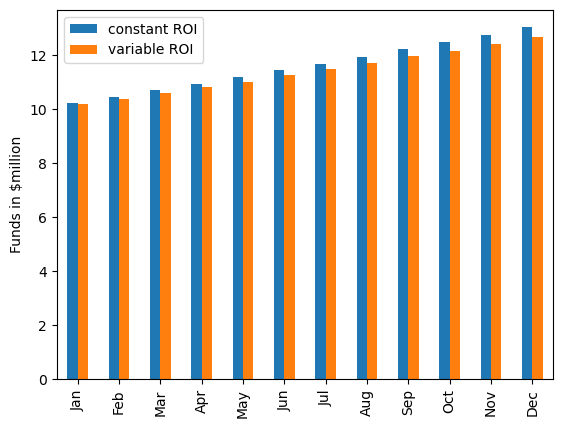

In [217]:
fund_comp.plot(kind='bar',ylabel='Funds in $million')

# Below is the table showing the month to month difference for each medium, as using the monthly variable ROI, as it's obvious that there are many month to month changes over 1 million dollars which means they are not 'stable'!

In [219]:
dffs=pd.DataFrame(dffs)

dffs.index=['Feb-Jan','Mar-Feb','Apr-Mar','May-Apr','Jun-May','Jul-Jun','Aug-Jul','Sep-Aug','Oct-Sep','Nov-Oct','Dec-Nov']

def highlight2(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if cell_value >1 or cell_value<-1:
        return highlight
    else:
        return default
dffs.style.applymap(highlight2)



platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Feb-Jan,0.000000,0.000000,0.000000,1.062167,3.000000,0.000000,-2.666667,0.000000,1.791000,-3.000000
Mar-Feb,-3.000000,0.000000,0.000000,0.604500,-3.000000,3.000000,1.389648,0.000000,1.209000,0.000000
Apr-Mar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610352,0.000000,-1.403144,0.000000
May-Apr,1.804100,0.000000,0.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,1.403144,3.000000
Jun-May,1.195900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.979828,0.000000
Jul-Jun,-1.876223,0.000000,0.000000,3.000000,1.123777,0.000000,0.000000,0.000000,0.979828,-3.000000
Aug-Jul,1.876223,0.000000,0.000000,-1.172706,-1.123777,0.654588,-3.000000,0.000000,0.000000,3.000000
Sep-Aug,-1.637067,0.000000,0.000000,1.172706,0.000000,2.345412,0.000000,0.000000,0.000000,-1.637067
Oct-Sep,-1.362933,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,-3.000000,1.592543
Nov-Oct,3.000000,0.000000,0.000000,-0.943579,0.000000,-1.887158,0.000000,0.000000,0.000000,0.044525


# 9
**Write an pdf file that does all of this and summarizes your analysis with graphs, text, and code chunks. The first few lines of the Rmd file, in the first code chunk at the beginning, should include pd.read_csv call that reads the csv file that has the ROI data.  Be sure to include a noticeable comment that lets us know where you read the csv files.  The template csv files fit the correct format.  To be graded, we will change this pd.read_csv call to load a new csv file and re-run your code to see if you get the right answer on new data.  Failure to run will automatically reduce your grade by 10 percentage points!  Be sure that all your analysis in the python code file is generalized, so when we load the new csv files the output will be for the new data, instead of the template data.  That means you should not hard code any numbers.  Instead you should reference variable names for your output.**

# 10